<a href="https://colab.research.google.com/github/niket-malviya/Data-Science-and-Python/blob/main/image%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                                    title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
jayaantanaath/student-habits-vs-academic-performance                   Student Habits vs Academic Performance                   19512  2025-04-12 10:49:08.663000           4710         79  1.0              
adilshamim8/student-depression-dataset                                 Student Depression Dataset                              467020  2025-03-13 03:12:30.423000          21501        343  1.0              
melissamonfared/qs-world-university-rankings-2025                      QS World University Rankings 2025                        70496  2025-04-21 15:47:28.667000           

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [5]:
#generators --used to process large amounts of data
#generators-- training and validating
#train
train_ds=keras.utils.image_dataset_from_directory('/content/train',
labels='inferred',
label_mode='int',
batch_size=32,
image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [6]:
#validating
validate_ds=keras.utils.image_dataset_from_directory('/content/test',
labels='inferred',
label_mode='int',
batch_size=32,
image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


In [7]:
#normalising the numpy array
#try to get iamge, label and transform
#pixels should be between 0 to 1
#0.,1.
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  #converting the pixel values into float
  return image,label
train_ds=train_ds.map(process)
validate_ds=validate_ds.map(process)

In [8]:
#building a cnn model and passing the data into cnn model
#cnn - convolutional neural networks
#3 layers -- 32,64,128
model = Sequential()

#1st convolutional block
#32 filters
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
#padding=valid -- no padding around the image, reduces the image size slightly
#relu --rectified linear unit to maintain the non linearity
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
#maxpooling 2D -- takes 2*2 area and keeps only maximum value / down sampling (choosing the highest value )


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
#try to maintain all the layers connected

model.add(Dense(128,activation='relu'))
#128 neurons with relu activation
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
#output layer

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#compiling the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(train_ds,epochs=10,validation_data=validate_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.5897 - loss: 0.6630 - val_accuracy: 0.7428 - val_loss: 0.5182
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 73ms/step - accuracy: 0.7630 - loss: 0.4929 - val_accuracy: 0.7938 - val_loss: 0.4510
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 68ms/step - accuracy: 0.8177 - loss: 0.3958 - val_accuracy: 0.7968 - val_loss: 0.4877
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 74ms/step - accuracy: 0.8829 - loss: 0.2733 - val_accuracy: 0.7970 - val_loss: 0.6296
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.9459 - loss: 0.1379 - val_accuracy: 0.7944 - val_loss: 0.9817
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.9653 - loss: 0.0952 - val_accuracy: 0.7920 - val_loss: 1.0720
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.9774 - loss: 0.0604 - val_accuracy: 0.7906 - val_loss: 1.0931
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - accuracy: 0.9872 - loss: 0.0408 - 

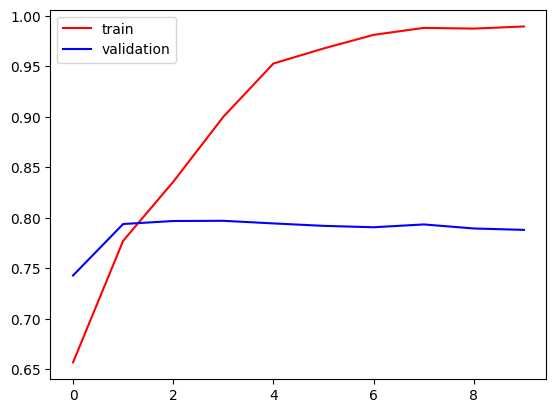

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

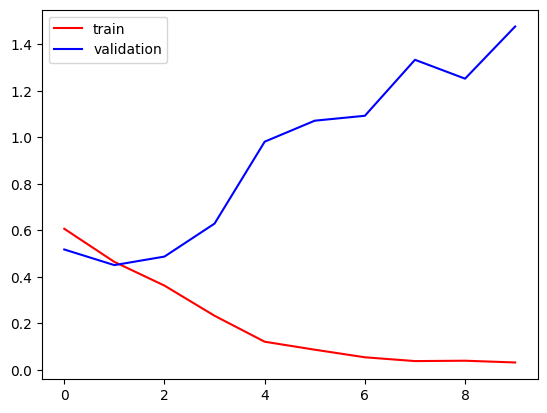

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
import cv2
test_img=cv2.imread('/content/puppy-01.jpeg.jpg')
test_img.shape
test_img=cv2.resize(test_img,(256,256))
test_input = test_img.reshape(1,256,256,3)
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 869ms/step


array([[1.]], dtype=float32)

In [16]:
test_img=cv2.imread('/content/cat-01.jpeg.jpg')
test_img.shape
test_img=cv2.resize(test_img,(256,256))
test_input = test_img.reshape(1,256,256,3)
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[0.]], dtype=float32)